In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/61050960/Dataset/main/pima-indians-diabetes1.csv?raw=true'
df = pd.read_csv(url)
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Outlier

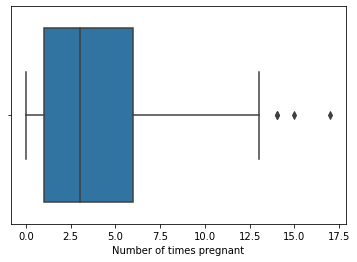

In [ ]:
test = df.iloc[:,0]
sns.boxplot(x=test)

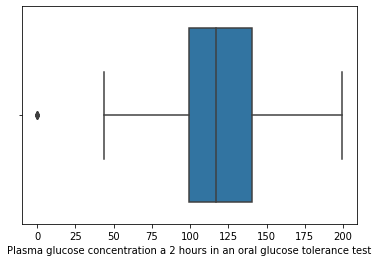

In [ ]:
test1 = df.iloc[:,1]
sns.boxplot(x=test1)

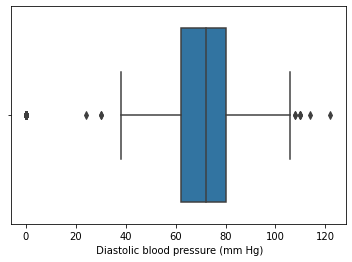

In [ ]:
test2 = df.iloc[:,2]
sns.boxplot(x=test2)

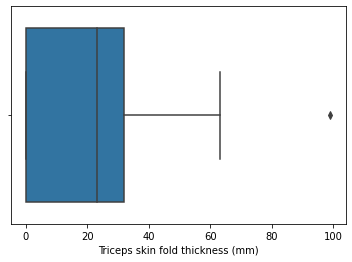

In [ ]:
test3 = df.iloc[:,3]
sns.boxplot(x=test3)

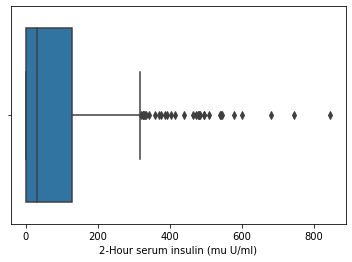

In [ ]:
test4 = df.iloc[:,4]
sns.boxplot(x=test4)

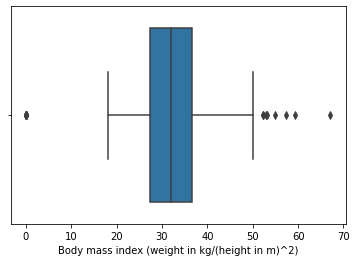

In [ ]:
test5 = df.iloc[:,5]
sns.boxplot(x=test5)

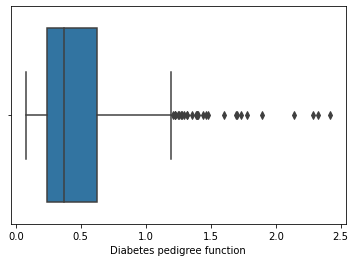

In [ ]:
test6 = df.iloc[:,6]
sns.boxplot(x=test6)

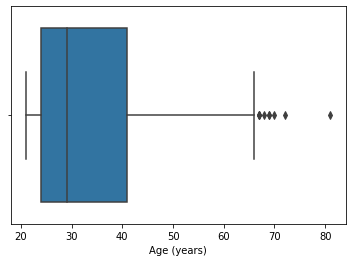

In [ ]:
test7 = df.iloc[:,7]
sns.boxplot(x=test7)

In [ ]:
def Outlier(dat,i):
  q25 = dat.iloc[:,i].quantile(0.25)
  q75 = dat.iloc[:,i].quantile(0.75)
  IQR = q75 - q25
  upperlimit = q75 + 1.5*IQR
  lowerlimit = q25 - 1.5*IQR
  outlier = np.bitwise_or(dat.iloc[:,i] > upperlimit,dat.iloc[:,i]< lowerlimit)
  print("upper limit => ",upperlimit)
  print("lower limit => ",lowerlimit)
  dat.iloc[outlier,i] = np.mean(dat.iloc[:,i])

In [ ]:
for i in range(len(df.columns)-1):
  print("column : ",i)
  Outlier(df,i)

column :  0
upper limit =>  13.5
lower limit =>  -6.5
column :  1
upper limit =>  202.125
lower limit =>  37.125
column :  2
upper limit =>  107.0
lower limit =>  35.0
column :  3
upper limit =>  80.0
lower limit =>  -48.0
column :  4
upper limit =>  318.125
lower limit =>  -190.875
column :  5
upper limit =>  50.550000000000004
lower limit =>  13.35
column :  6
upper limit =>  1.2
lower limit =>  -0.32999999999999996
column :  7
upper limit =>  66.5
lower limit =>  -1.5


# Sequential Feature Selector

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
knn = KNeighborsClassifier(n_neighbors=2)


# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=8, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=8,
          n_jobs=-1)
sfs = sfs.fit(X, y)
sfs1 = sfs.k_feature_idx_

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6145833333333334, 0.71875, 0.63541666666666...",0.682292,"(1,)",0.0311214,0.0357065,0.0134958
2,"(1, 5)","[0.7083333333333334, 0.7291666666666666, 0.687...",0.720052,"(1, 5)",0.0258543,0.0296635,0.0112118
3,"(1, 5, 6)","[0.7083333333333334, 0.71875, 0.71875, 0.6875,...",0.722656,"(1, 5, 6)",0.0231193,0.0265255,0.0100257
4,"(1, 4, 5, 6)","[0.71875, 0.6979166666666666, 0.73958333333333...",0.71224,"(1, 4, 5, 6)",0.0217412,0.0249443,0.00942807
5,"(1, 4, 5, 6, 7)","[0.7291666666666666, 0.7291666666666666, 0.708...",0.71875,"(1, 4, 5, 6, 7)",0.025275,0.0289988,0.0109605
6,"(0, 1, 4, 5, 6, 7)","[0.7291666666666666, 0.71875, 0.70833333333333...",0.723958,"(0, 1, 4, 5, 6, 7)",0.0175815,0.0201718,0.00762422
7,"(0, 1, 3, 4, 5, 6, 7)","[0.71875, 0.6875, 0.6875, 0.7395833333333334, ...",0.72526,"(0, 1, 3, 4, 5, 6, 7)",0.021262,0.0243945,0.00922026
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7083333333333334, 0.7395833333333334, 0.677...",0.71875,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0208027,0.0238676,0.0090211


In [ ]:
sbs = SFS(knn, 
          k_features=8, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=8,
          n_jobs=-1)
sbs = sbs.fit(X, y)

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
8,0.71875,0.0208027,"[0.7083333333333334, 0.7395833333333334, 0.677...","(0, 1, 2, 3, 4, 5, 6, 7)","(0, 1, 2, 3, 4, 5, 6, 7)",0.0238676,0.0090211


In [ ]:
sffs = SFS(knn, 
           k_features=8, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=8,
           n_jobs=-1)
sffs = sffs.fit(X, y)

pd.DataFrame.from_dict(sffs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6145833333333334, 0.71875, 0.63541666666666...",0.682292,"(1,)",0.0311214,0.0357065,0.0134958
2,"(1, 5)","[0.7083333333333334, 0.7291666666666666, 0.687...",0.720052,"(1, 5)",0.0258543,0.0296635,0.0112118
3,"(1, 5, 6)","[0.7083333333333334, 0.71875, 0.71875, 0.6875,...",0.722656,"(1, 5, 6)",0.0231193,0.0265255,0.0100257
4,"(1, 4, 5, 6)","[0.71875, 0.6979166666666666, 0.73958333333333...",0.71224,"(1, 4, 5, 6)",0.0217412,0.0249443,0.00942807
5,"(1, 4, 5, 6, 7)","[0.7291666666666666, 0.7291666666666666, 0.708...",0.71875,"(1, 4, 5, 6, 7)",0.025275,0.0289988,0.0109605
6,"(0, 1, 3, 4, 5, 7)","[0.7291666666666666, 0.6875, 0.6875, 0.7395833...",0.726562,"(0, 1, 3, 4, 5, 7)",0.0211709,0.02429,0.00918078
7,"(0, 1, 3, 4, 5, 6, 7)","[0.71875, 0.6875, 0.6875, 0.7395833333333334, ...",0.72526,"(0, 1, 3, 4, 5, 6, 7)",0.021262,0.0243945,0.00922026
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.7083333333333334, 0.7395833333333334, 0.677...",0.71875,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0208027,0.0238676,0.0090211


# Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn as sk
import xgboost as xgb

X = df.iloc[:,[0, 1, 3, 4, 5, 7]] #Feature_selection_SFFS
y = df.iloc[:,-1]

def evaluation_accuracy(prediction,actual):
	acc = sum(prediction==actual)/len(prediction)
	return acc

#ทำนาย model โดยใช้ข้อมูลที่ไม่ normalization
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=1)

#DecisionTree
clf_NDT = DecisionTreeClassifier(random_state=0, max_depth=2)
clf_NDT = clf_NDT.fit(X1_train,y1_train)
y_pred_NDT = clf_NDT.predict(X1_test)
print('Accuracy DecisionTree =',evaluation_accuracy(y_pred_NDT,y1_test))
#print(confusion_matrix(y_pred_NDT, y1_test))

#GradientBoosting
clf_NGB = GradientBoostingClassifier(random_state=0)
clf_NGB = clf_NGB.fit(X1_train,y1_train)
y_pred_NGB = clf_NGB.predict(X1_test)
print('Accuracy GradientBoosting =',evaluation_accuracy(y_pred_NGB,y1_test))

#RandomForest
clf_NRF = RandomForestClassifier(max_depth=2, random_state=0)
clf_NRF = clf_NRF.fit(X1_train,y1_train)
y_pred_NRF = clf_NRF.predict(X1_test)
print('Accuracy RandomForest =',evaluation_accuracy(y_pred_NRF,y1_test))
#print(confusion_matrix(y1_test, y_pred_NRF))


#XGBoost
regressor = xgb.XGBClassifier(n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)
regressor.fit(X1_train,y1_train)
y_pred_XGB = regressor.predict(X1_test)
print('Accuracy XGBoost =',evaluation_accuracy(y_pred_XGB,y1_test))

Accuracy DecisionTree = 0.7532467532467533
Accuracy GradientBoosting = 0.7662337662337663
Accuracy RandomForest = 0.7532467532467533
Accuracy XGBoost = 0.7922077922077922
